In [74]:
from pydicom import dcmread
from pydicom.data import get_testdata_file
import numpy as np
import matplotlib.pyplot as plt

## Understanding the API

Image Data in Dicom is stored a a pixel array. In additoon Metadata on each Image, ImageSeries and Studies are stored together. This ensures no picture is processed out of context.


In [100]:
#path = get_testdata_file("CT_small.dcm")
path = "dicoms/N2D_050.dcm"
ds = dcmread(path)

FileNotFoundError: [Errno 2] No such file or directory: 'dicoms/N2D_050.dcm'

In [101]:
type(ds.PixelData)

bytes

In [102]:
len(ds.PixelData)

210432

In [103]:
ds.PixelData[:4]

b'\x00\x00\x00\x00'

In [104]:
# Lower number is darker, higher number is lighter
ds.pixel_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

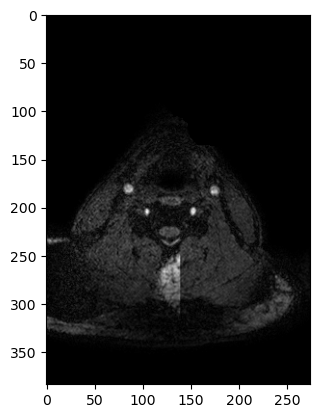

In [105]:
plt.imshow(ds.pixel_array, cmap="gray")
plt.show()

In [99]:
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 236
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.2.1143.3463273594277583079395132518247896473
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.2.1143.107.104.103.115.2.8.3
(0002, 0013) Implementation Version Name         SH: 'GDCM 2.8.3'
(0002, 0016) Source Application Entity Title     AE: 'gdcmanon'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.2.1143.3463273594277583079395132518247896473
(0008, 0020) 

## Dicom and Interoperability

While DICOM is a globally accepted standard in Radiology and other image processing disciplines, it is not embedded into a wider system of entities. In order to achieve this, we need to convert/associate DICOM images with FHIR data.

Resources needed:
- ImagingStudy (https://www.hl7.org/fhir/imagingstudy.html)

Conversion:
- https://hackmd.io/@victoriatjia/fhir-resources-imagingStudy

Some patterns:
- https://github.com/LinuxForHealth/dicom-fhir-converter
- Output does not validate... let's do it ourselves :-)


In [47]:
from fhir.resources.imagingstudy import ImagingStudy, ImagingStudySeries

In [38]:
fhir_ds = ImagingStudy(
    id = "f001",
    status = "available",
    subject = { "reference": "Patient/f001", "display": "P. van de Heuvel" },
)

In [40]:
print(fhir_ds.json())

{"resourceType": "ImagingStudy", "id": "f001", "status": "available", "subject": {"reference": "Patient/f001", "display": "P. van de Heuvel"}}


In [45]:
dir(fhir_ds)

['Config',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__class_vars__',
 '__config__',
 '__custom_root_type__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__exclude_fields__',
 '__fields__',
 '__fields_set__',
 '__format__',
 '__ge__',
 '__get_validators__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__include_fields__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__json_encoder__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__post_root_validators__',
 '__pre_root_validators__',
 '__pretty__',
 '__private_attributes__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__repr_args__',
 '__repr_name__',
 '__repr_str__',
 '__rich_repr__',
 '__schema_cache__',
 '__setattr__',
 '__setstate__',
 '__signature__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__try_update_forward_refs__',
 '__validators__',
 '_abc_impl',
 '_calculate_keys',
 '_copy_and_set_values',
 '_decompose_class',
 '_enfo

In [48]:
fhir_ds.series = ImagingStudySeries(type = )

ValidationError: 1 validation error for ImagingStudySeries
__root__ -> uid
  field required (type=value_error.missing)

In [43]:
print(fhir_ds.json())

{"resourceType": "ImagingStudy", "id": "f001", "status": "available", "subject": {"reference": "Patient/f001", "display": "P. van de Heuvel"}}
